# Exploring the TCGA liver cancer dataset for hacknights workshops/projects

## Setup libraries

### install Bioconductor if haven't already

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [2]:
BiocManager::install(update=TRUE,ask=FALSE)

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)


### install/load RTCGA libraries

In [ ]:
BiocManager::install("RTCGA.clinical")
BiocManager::install("RTCGA.rnaseq")


In [3]:
library(RTCGA.clinical)
library(RTCGA.rnaseq)

Loading required package: RTCGA
Welcome to the RTCGA (version: 1.14.0).


### load other libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [40]:
install.packages("purrr")


The downloaded binary packages are in
	/var/folders/00/hrw448cj27l47l_0f2lrz1rr0000gp/T//RtmpUyTfT1/downloaded_packages


In [2]:
library(purrr)

## Liver clinical and rnaseq datasets

We are focusing on cancers where the primary site includes the liver. 

http://bioconductor.org/packages/release/data/experiment/manuals/RTCGA.clinical/man/RTCGA.clinical.pdf

http://bioconductor.org/packages/release/data/experiment/manuals/RTCGA.clinical/man/RTCGA.clinical.pdf

### Clinical

#### bring datasets into memory

##### LUAD

https://portal.gdc.cancer.gov/projects/TCGA-LUAD

In [4]:
luad_clinical <- RTCGA.clinical::LUAD.clinical

In [26]:
luad_clinical %>% write_csv(gzfile('luad_clinical.csv.gz'))

##### LUSC

https://portal.gdc.cancer.gov/projects/TCGA-LUSC

In [6]:
lusc_clinical <- RTCGA.clinical::LUSC.clinical

In [25]:
lusc_clinical %>% write_csv(gzfile('lusc_clinical.csv.gz'))

##### MESO

https://portal.gdc.cancer.gov/projects/TCGA-MESO

In [8]:
meso_clinical <- RTCGA.clinical::MESO.clinical

In [24]:
meso_clinical %>% write_csv(gzfile('meso_clinical.csv.gz'))

##### LIHC

https://portal.gdc.cancer.gov/projects/TCGA-LIHC

In [10]:
lihc_clinical <- RTCGA.clinical::LIHC.clinical

In [22]:
lihc_clinical %>% write_csv(gzfile('lihc_clinical.csv.gz'))

#####  clinical dataset list

In [11]:
clinical_dataset_list <- list("luad"=luad_clinical,"lusc"=lusc_clinical,"meso"=meso_clinical,"lihc"=lihc_clinical)

#### View

##### LUAD

In [46]:
name = 'luad'
df = clinical_dataset_list[[name]]
dim(df)
head(df)

[1]  522 3046

,admin.bcr,admin.day_of_dcc_upload,admin.disease_code,admin.file_uuid,admin.month_of_dcc_upload,admin.patient_withdrawal.withdrawn,admin.project_code,admin.year_of_dcc_upload,patient.additional_studies,patient.additional_studies.additional_study.disease_code,⋯,patient.samples.sample.preservation_method,patient.samples.sample.sample_type,patient.samples.sample.sample_type_id,patient.samples.sample.shortest_dimension,patient.samples.sample.time_between_clamping_and_freezing,patient.samples.sample.time_between_excision_and_freezing,patient.samples.sample.tissue_type,patient.samples.sample.tumor_descriptor,patient.samples.sample.tumor_pathology,patient.samples.sample.vial_number
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
52.70.0,nationwide children's hospital,1,luad,071e3c36-bd5c-49b2-b3d3-0eb4e781810f,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
52.70.0.1,nationwide children's hospital,1,luad,74423066-665a-43f2-a801-fb4f83ee15e9,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.5,NA,NA,NA,NA,NA,a
52.70.0.2,nationwide children's hospital,1,luad,b06fd27e-a052-459f-be7b-c6e336a6629d,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.4,NA,NA,NA,NA,NA,a
52.70.0.3,nationwide children's hospital,1,luad,4bdbf19f-48c2-4565-a5b6-9ada2ef93e74,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
58.73.0,nationwide children's hospital,1,luad,ba34c6c3-4068-4665-8239-a5694644eab8,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
119.72.0,nationwide children's hospital,1,luad,092cfc6d-b91f-4787-8d7b-49a936d848b4,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,0.4,NA,NA,NA,NA,NA,a


##### LUSC

In [47]:
name = 'lusc'
df = clinical_dataset_list[[name]]
dim(df)
head(df)

[1]  504 2698

,admin.bcr,admin.day_of_dcc_upload,admin.disease_code,admin.file_uuid,admin.month_of_dcc_upload,admin.patient_withdrawal.withdrawn,admin.project_code,admin.year_of_dcc_upload,patient.additional_studies,patient.age_at_initial_pathologic_diagnosis,⋯,patient.samples.sample.preservation_method,patient.samples.sample.sample_type,patient.samples.sample.sample_type_id,patient.samples.sample.shortest_dimension,patient.samples.sample.time_between_clamping_and_freezing,patient.samples.sample.time_between_excision_and_freezing,patient.samples.sample.tissue_type,patient.samples.sample.tumor_descriptor,patient.samples.sample.tumor_pathology,patient.samples.sample.vial_number
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39.63.0,nationwide children's hospital,1,lusc,b34e8d44-9f2d-4ab3-a189-ecb5b77af723,10,false,tcga,2015,NA,67,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
39.63.0.1,nationwide children's hospital,1,lusc,2fc3e9ed-7219-4d78-8964-a5c9de65b8da,10,false,tcga,2015,NA,72,⋯,NA,primary tumor,01,0.2,NA,NA,NA,NA,NA,a
39.63.0.2,nationwide children's hospital,1,lusc,1af63f26-0d2a-463b-ba33-7b60ab118b50,10,false,tcga,2015,NA,77,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
39.63.0.3,nationwide children's hospital,1,lusc,730b1e78-6f9a-45a6-a246-e473ae0116e3,10,false,tcga,2015,NA,74,⋯,NA,primary tumor,01,0.2,NA,NA,NA,NA,NA,a
39.63.0.4,nationwide children's hospital,1,lusc,293cc082-7d2c-416a-be35-062bb8ee1b87,10,false,tcga,2015,NA,81,⋯,NA,primary tumor,01,0.3,NA,NA,NA,NA,NA,a
39.63.0.5,nationwide children's hospital,1,lusc,5eee6807-0ee7-4ad7-84a4-f36552a70695,10,false,tcga,2015,NA,63,⋯,NA,primary tumor,01,0.5,NA,NA,NA,NA,NA,a


##### MESO

In [50]:
name = 'meso'
df = clinical_dataset_list[[name]]
dim(df)
head(df)

[1]  87 894

,admin.bcr,admin.day_of_dcc_upload,admin.disease_code,admin.file_uuid,admin.month_of_dcc_upload,admin.patient_withdrawal.withdrawn,admin.project_code,admin.year_of_dcc_upload,patient.additional_studies,patient.asbestos_exposure_age,⋯,patient.samples.sample.preservation_method,patient.samples.sample.sample_type,patient.samples.sample.sample_type_id,patient.samples.sample.shortest_dimension,patient.samples.sample.time_between_clamping_and_freezing,patient.samples.sample.time_between_excision_and_freezing,patient.samples.sample.tissue_type,patient.samples.sample.tumor_descriptor,patient.samples.sample.tumor_pathology,patient.samples.sample.vial_number
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
418.36.0,nationwide children's hospital,1,meso,be213c85-e379-42fc-918a-1fe13c4d0201,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
418.36.0.1,nationwide children's hospital,1,meso,7a8ecc55-002e-4650-98f8-84806b919c17,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
418.36.0.2,nationwide children's hospital,1,meso,eb988691-41bd-412e-9e6c-82bd7050dc1b,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
418.36.0.3,nationwide children's hospital,1,meso,eb48bed3-00e5-45aa-8803-6ce81c7b1fff,10,false,tcga,2015,NA,25,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
418.36.0.4,nationwide children's hospital,1,meso,07b76d74-59b8-4860-97b9-cef6a238d6a6,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
418.36.0.5,nationwide children's hospital,1,meso,f352e491-5cbd-4c60-8ada-0d12ea6218eb,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a


##### LIHC

In [51]:
name = 'lihc'
df = clinical_dataset_list[[name]]
dim(df)
head(df)

[1]  377 1587

,admin.bcr,admin.day_of_dcc_upload,admin.disease_code,admin.file_uuid,admin.month_of_dcc_upload,admin.patient_withdrawal.withdrawn,admin.project_code,admin.year_of_dcc_upload,patient.ablation_embolization_tx_adjuvant,patient.additional_studies,⋯,patient.samples.sample.preservation_method,patient.samples.sample.sample_type,patient.samples.sample.sample_type_id,patient.samples.sample.shortest_dimension,patient.samples.sample.time_between_clamping_and_freezing,patient.samples.sample.time_between_excision_and_freezing,patient.samples.sample.tissue_type,patient.samples.sample.tumor_descriptor,patient.samples.sample.tumor_pathology,patient.samples.sample.vial_number
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
384.44.0,nationwide children's hospital,1,lihc,47a9da83-f87b-45a0-a501-542c5a9df212,10,false,tcga,2015,no,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
399.42.0,nationwide children's hospital,1,lihc,ada84bc2-9724-428c-9557-7280af5f8297,10,false,tcga,2015,no,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
399.42.0.1,nationwide children's hospital,1,lihc,b9f63d47-2293-4360-b373-5acdaa2ec7cb,10,false,tcga,2015,NA,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
399.42.0.2,nationwide children's hospital,1,lihc,2b488ba2-f46b-4d0b-8c73-d9a761ab61b1,10,false,tcga,2015,no,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
399.42.0.3,nationwide children's hospital,1,lihc,69fc70f4-fe6a-472a-b354-cf37515c524d,10,false,tcga,2015,no,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a
399.42.0.4,nationwide children's hospital,1,lihc,14e975d3-8375-462a-aa65-62b2297a360e,10,false,tcga,2015,no,NA,⋯,NA,primary tumor,01,NA,NA,NA,NA,NA,NA,a


### RNASeq

the column names are gene names and entrez gene ids separated by a "|"

I don't think I can remove the data load error - where the column names are too long.

#### bring datasets into memory

##### LUAD

https://portal.gdc.cancer.gov/projects/TCGA-LUAD

In [12]:
luad_rnaseq <- RTCGA.rnaseq::LUAD.rnaseq

In [27]:
luad_rnaseq %>% write_csv(gzfile('luad_rnaseq.csv.gz'))

##### LUSC

https://portal.gdc.cancer.gov/projects/TCGA-LUSC

In [14]:
lusc_rnaseq <- RTCGA.rnaseq::LUSC.rnaseq

In [28]:
lusc_rnaseq %>% write_csv(gzfile('lusc_rnaseq.csv.gz'))

##### MESO

https://portal.gdc.cancer.gov/projects/TCGA-MESO

No RNASeq available :/

##### LIHC

https://portal.gdc.cancer.gov/projects/TCGA-LIHC

In [16]:
lihc_rnaseq <- RTCGA.rnaseq::LIHC.rnaseq

In [29]:
lihc_rnaseq %>% write_csv(gzfile('lihc_rnaseq.csv.gz'))

##### rnaseq dataset list

In [6]:
rnaseq_dataset_list <- list("luad"=luad_rnaseq,"lusc"=lusc_rnaseq,"lihc"=lihc_rnaseq)

#### View

##### LUAD

In [52]:
name = 'luad'
df = rnaseq_dataset_list[[name]]
dim(df)
head(df)

[1]   576 20532

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

bcr_patient_barcode,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,⋯,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-05-4244-01A-01R-1107-07,0,10.0113,11.2820,49.5994,848.9397,0,345.2308,1.0472,0.0000,⋯,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.944,871.2802,575.2683,6.6323,0.0000
TCGA-05-4249-01A-01R-1107-07,0,7.1957,12.4436,90.5117,924.0158,0,145.2025,1.6098,0.0000,⋯,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.250,1138.1170,690.2752,179.9738,0.0000
TCGA-05-4250-01A-01R-1107-07,0,7.2453,6.0184,49.5366,1140.6781,0,51.7284,0.0000,0.0000,⋯,60.0182,365.4149,843.9028,26.5274,475.1720,5437.453,1170.5214,532.8691,6.3003,0.0000
TCGA-05-4382-01A-01R-1206-07,0,11.3311,7.5740,82.8303,807.1729,0,240.0221,0.4786,0.2393,⋯,40.4424,346.7517,946.6872,64.8514,908.1593,6770.154,1169.2401,663.8297,35.1777,0.0000
TCGA-05-4384-01A-01R-1755-07,0,3.2254,3.4942,72.5351,562.0037,0,274.2822,0.6109,0.0000,⋯,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.478,1737.3244,723.2743,378.1307,0.0000
TCGA-05-4389-01A-01R-1206-07,0,4.0000,13.7852,66.3658,1342.6174,0,45.3020,0.3356,0.0000,⋯,79.5302,625.5034,1011.4094,71.8121,534.8993,2565.436,679.1946,753.0201,11.0738,0.6711


In [54]:
col_nchars <- sapply(colnames(df),nchar)

In [56]:
min(col_nchars);max(col_nchars)

[1] 5

[1] 25

##### LUSC

In [42]:
name = 'lusc'
df = rnaseq_dataset_list[[name]]
dim(df)
head(df)

[1]   552 20532

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

bcr_patient_barcode,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,⋯,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-18-3406-01A-01R-0980-07,0,75.3622,25.4252,279.9764,1510.2362,0,23.6220,0.0000,0,⋯,75.5906,403.9370,428.3465,2.3622,986.6142,1914.9606,265.3543,738.5827,7.0866,0.0000
TCGA-18-3407-01A-01R-0980-07,0,14.4148,6.9933,198.2540,968.6013,0,301.6175,0.0000,0,⋯,42.8164,303.9962,1270.2188,5.7088,854.4244,4221.6936,702.6641,960.9895,11.4177,0.4757
TCGA-18-3408-01A-01R-0980-07,0,8.4888,3.3754,254.5929,1474.1213,0,49.2362,1.7796,0,⋯,51.0159,377.2801,944.9800,8.3049,643.0372,526.1753,589.6485,757.5263,5.9321,18.3894
TCGA-18-3409-01A-01R-0980-07,0,2.5897,7.1538,164.3744,944.6154,0,93.3333,1.0256,0,⋯,86.6667,616.9231,1090.2564,1.5385,1168.2051,4388.2051,807.1795,1008.7179,48.2051,0.0000
TCGA-18-3410-01A-01R-0980-07,0,16.6653,19.5722,200.8033,1156.0568,0,120.9232,0.0000,0,⋯,40.5703,239.8769,1036.3153,161.8873,711.7529,3029.7749,735.7800,884.2752,5.5144,7.8777
TCGA-18-3411-01A-01R-0980-07,0,12.9418,14.4142,277.6667,1119.5816,0,33.3903,0.4023,0,⋯,35.8041,255.0538,683.8982,3.6206,539.0727,2832.9478,321.4322,966.7102,9.2527,2.0115


##### LIHC

In [43]:
name = 'lihc'
df = rnaseq_dataset_list[[name]]
dim(df)
head(df)

[1]   423 20532

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

bcr_patient_barcode,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,⋯,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-2V-A95S-01A-11R-A37K-07,0,1.5051,3.7074,90.1124,1017.1038,0,141.3911,0.6516,0.0000,⋯,24.7597,273.6602,794.2662,18.2440,499.1041,3172.504,890.0472,510.1808,3.9094,6.5157
TCGA-2Y-A9GS-01A-12R-A38B-07,0,26.4120,2.6663,71.0054,639.2311,0,122.7206,1.4786,0.0000,⋯,68.5067,632.8241,1153.7703,71.4638,1000.4929,5301.134,755.5446,860.5224,6.4071,482.9966
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0.0000,4.4833,95.5122,742.4344,0,95.0460,1.7933,0.8967,⋯,46.6263,1219.4575,1133.3782,12.5532,1289.3970,3219.009,860.7935,523.6494,14.3466,83.3894
TCGA-2Y-A9GU-01A-11R-A38B-07,0,5.7222,5.1216,61.6679,1186.9807,0,280.2709,0.8341,0.0000,⋯,18.3511,285.2758,1150.2786,9.1755,941.7437,3092.990,1339.6283,343.6655,2.5024,2.5024
TCGA-2Y-A9GV-01A-11R-A38B-07,0,11.4975,5.4230,104.4670,878.1726,0,282.5719,0.0000,0.0000,⋯,41.4552,999.1540,1631.9797,4.2301,1380.7107,2902.707,575.2961,665.8206,2.5381,119.2893
TCGA-2Y-A9GW-01A-11R-A38B-07,0,3.9234,7.5709,99.4866,690.4215,0,68.9655,0.0000,0.0000,⋯,19.9234,1646.7433,706.5134,29.8851,747.1264,8466.667,992.3372,456.7050,6.8966,102.6820


## loading biomaRt to map genes to pathways/functions

https://bioconductor.org/packages/release/bioc/vignettes/biomaRt/inst/doc/biomaRt.html

### install if haven't already

In [57]:
BiocManager::install("biomaRt")

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)
Installing package(s) 'biomaRt'
also installing the dependencies ‘bit’, ‘bit64’, ‘blob’, ‘memoise’, ‘RSQLite’, ‘AnnotationDbi’




The downloaded binary packages are in
	/var/folders/00/hrw448cj27l47l_0f2lrz1rr0000gp/T//Rtmp161D0k/downloaded_packages


### load biomaRt

In [30]:
library(biomaRt)

Warning message:
“package ‘biomaRt’ was built under R version 3.6.1”

### get Mart and map to GO pathwys

In [2]:
listMarts()

biomart,version
<chr>,<chr>
ENSEMBL_MART_ENSEMBL,Ensembl Genes 97
ENSEMBL_MART_MOUSE,Mouse strains 97
ENSEMBL_MART_SNP,Ensembl Variation 97
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 97


In [33]:
ensembl = useMart("ensembl",dataset="hsapiens_gene_ensembl")

In [34]:
head(listAttributes(ensembl))

name,description,page
<chr>,<chr>,<chr>
ensembl_gene_id,Gene stable ID,feature_page
ensembl_gene_id_version,Gene stable ID version,feature_page
ensembl_transcript_id,Transcript stable ID,feature_page
ensembl_transcript_id_version,Transcript stable ID version,feature_page
ensembl_peptide_id,Protein stable ID,feature_page
ensembl_peptide_id_version,Protein stable ID version,feature_page


In [35]:
listAttributes(ensembl)$description[1:100]

[1] "Gene stable ID"                            
  [2] "Gene stable ID version"                    
  [3] "Transcript stable ID"                      
  [4] "Transcript stable ID version"              
  [5] "Protein stable ID"                         
  [6] "Protein stable ID version"                 
  [7] "Exon stable ID"                            
  [8] "Gene description"                          
  [9] "Chromosome/scaffold name"                  
 [10] "Gene start (bp)"                           
 [11] "Gene end (bp)"                             
 [12] "Strand"                                    
 [13] "Karyotype band"                            
 [14] "Transcript start (bp)"                     
 [15] "Transcript end (bp)"                       
 [16] "Transcription start site (TSS)"            
 [17] "Transcript length (including UTRs and CDS)"
 [18] "Transcript support level (TSL)"            
 [19] "GENCODE basic annotation"                  
 [20] "APPRIS annotation"                         
 [21] "RefSeq match transcript"                   
 [22] "Gene name"                                 
 [23] "Source of gene name"                       
 [24] "Transcript name"                           
 [25] "Source of transcript name"                 
 [26] "Transcript count"                          
 [27] "Gene % GC content"                         
 [28] "Gene type"                                 
 [29] "Transcript type"                           
 [30] "Source (gene)"                             
 [31] "Source (transcript)"                       
 [32] "Version (gene)"                            
 [33] "Version (transcript)"                      
 [34] "Version (protein)"                         
 [35] "Phenotype description"                     
 [36] "Source name"                               
 [37] "Study external reference"                  
 [38] "Strain name"                               
 [39] "Strain gender"                             
 [40] "P value"                                   
 [41] "GO term accession"                         
 [42] "GO term name"                              
 [43] "GO term definition"                        
 [44] "GO term evidence code"                     
 [45] "GO domain"                                 
 [46] "GOSlim GOA Accession(s)"                   
 [47] "GOSlim GOA Description"                    
 [48] "CCDS ID"                                   
 [49] "ChEMBL ID"                                 
 [50] "Clone-based (Ensembl) gene ID"             
 [51] "Clone-based (Ensembl) transcript ID"       
 [52] "DataBase of Aberrant 3' Splice Sites name" 
 [53] "DataBase of Aberrant 3' Splice Sites ID"   
 [54] "DataBase of Aberrant 5' Splice Sites name" 
 [55] "DataBase of Aberrant 5' Splice Sites ID"   
 [56] "Ensembl Human Transcript ID"               
 [57] "Ensembl Human Translation ID"              
 [58] "EntrezGene transcript name ID"             
 [59] "European Nucleotide Archive ID"            
 [60] "Expression Atlas ID"                       
 [61] "GeneDB ID"                                 
 [62] "HGNC ID"                                   
 [63] "HGNC symbol"                               
 [64] "HGNC transcript name ID"                   
 [65] "Human Protein Atlas accession"             
 [66] "Human Protein Atlas ID"                    
 [67] "INSDC protein ID"                          
 [68] "KEGG Pathway and Enzyme ID"                
 [69] "LRG display in Ensembl gene ID"            
 [70] "LRG display in Ensembl transcript ID"      
 [71] "MEROPS - the Peptidase Database ID"        
 [72] "MIM gene description"                      
 [73] "MIM gene accession"                        
 [74] "MIM morbid description"                    
 [75] "MIM morbid accession"                      
 [76] "miRBase accession"                         
 [77] "miRBase ID"                                
 [78] "miRBase transcript name ID"                
 [79] "NCBI gene descrip

In [32]:
listAttributes(ensembl)[grepl('Reactome',listAttributes(ensembl)$description),]

,name,description,page
,<chr>,<chr>,<chr>
83,reactome,Reactome ID,feature_page
84,reactome_gene,Reactome gene ID,feature_page
85,reactome_transcript,Reactome transcript ID,feature_page


In [23]:
listAttributes(ensembl)[grepl('GO term',listAttributes(ensembl)$description),]

,name,description,page
,<chr>,<chr>,<chr>
41,go_id,GO term accession,feature_page
42,name_1006,GO term name,feature_page
43,definition_1006,GO term definition,feature_page
44,go_linkage_type,GO term evidence code,feature_page


In [12]:
name='lihc'
ids=sapply(strsplit(colnames(rnaseq_dataset_list[[name]])[-c(1)],"[|]"),function(x){x[2]})
ids[1:5]

[1] "100130426" "100133144" "100134869" "10357"     "10431"

http://geneontology.org/docs/guide-go-evidence-codes/



In [29]:
go_map <- getBM(attributes = c('entrezgene_id', 'hgnc_symbol', 
                     'go_id', 'name_1006','go_linkage_type'),
      filters = 'entrezgene_id', 
      values = ids, 
      mart = ensembl)
head(go_map)

entrezgene_id,hgnc_symbol,go_id,name_1006,go_linkage_type
<int>,<chr>,<chr>,<chr>,<chr>
1,A1BG,,,
1,A1BG,GO:0005576,extracellular region,IDA
1,A1BG,GO:0005576,extracellular region,IEA
1,A1BG,GO:0005615,extracellular space,HDA
1,A1BG,GO:0005576,extracellular region,TAS
1,A1BG,GO:0070062,extracellular exosome,HDA


In [34]:
install.packages('jjb')


The downloaded binary packages are in
	/var/folders/00/hrw448cj27l47l_0f2lrz1rr0000gp/T//RtmpHgXX6D/downloaded_packages


In [36]:
library(jjb)

In [37]:
mkdir('data/')

In [38]:
go_map %>% write_csv('data/gene_ontology_mappings.csv')

## RNA level distributions

In [18]:
name = 'lihc'
df <- rnaseq_dataset_list[[name]]

In [19]:
dim(df)

[1]   423 20532

In [20]:
df_rownames <- df[,1]
df <- df %>% select(-bcr_patient_barcode)

In [21]:
df_colnames_entrez <- sapply(strsplit(colnames(df),"|"),
                      function(x){
                          as.integer(paste(x[(which(x %in% "|")+1):length(x)],collapse=''))
                      })
df_colnames_genes <- sapply(strsplit(colnames(df),"|"),
                      function(x){
                          paste(x[1:(which(x %in% "|")-1)],collapse='')
                      })

In [22]:
go_map <- read_csv('data/gene_ontology_mappings.csv') %>% select(entrezgene_id,hgnc_symbol) %>% distinct()

Parsed with column specification:
cols(
  entrezgene_id = col_double(),
  hgnc_symbol = col_character(),
  go_id = col_character(),
  name_1006 = col_character(),
  go_linkage_type = col_character()
)


In [138]:
df_genes <- df[,df_colnames_genes %in% go_map$hgnc_symbol]
colnames(df_genes) <- df_colnames_genes[which(df_colnames_genes %in% go_map$hgnc_symbol)]
df_genes %>% dim()

[1]   423 16831

In [53]:
df_genes_melted <- df_genes %>% gather('Gene') 
df_genes_melted %>% head()

Gene,value
<chr>,<dbl>
A1BG,22282.261
A1BG,22641.927
A1BG,77669.948
A1BG,9322.495
A1BG,84242.521
A1BG,73055.103


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


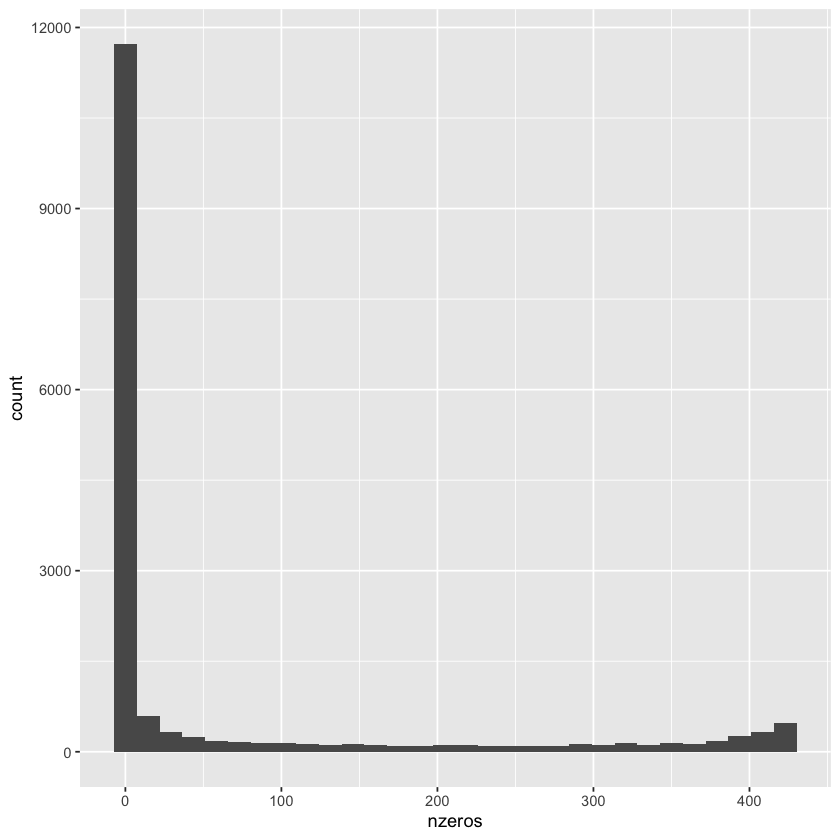

In [68]:
df_genes_melted %>% 
group_by(Gene) %>% 
summarize('nzeros' = sum(value==0)) %>% 
ggplot() + 
geom_histogram(aes(nzeros))

In [62]:
p = seq(0,1,0.01)
p_names <- map_chr(p, ~paste0(.x*100, "%"))
p_functions <- map(p, ~partial(quantile, probs = .x, na.rm = TRUE)) %>% 
  set_names(nm = p_names)

In [63]:
df_genes_melted_qs <- df_genes_melted %>% 
group_by(Gene) %>% 
summarize_at(vars(value), funs(!!!p_functions))

In [112]:
go_map <- read_csv('data/gene_ontology_mappings.csv') %>% 
filter(hgnc_symbol %in% colnames(df_genes)) %>% 
select(hgnc_symbol,name_1006) %>% 
distinct()

go_map %>% head()

pathway_table <- table(go_map$name_1006)

Parsed with column specification:
cols(
  entrezgene_id = col_double(),
  hgnc_symbol = col_character(),
  go_id = col_character(),
  name_1006 = col_character(),
  go_linkage_type = col_character()
)


hgnc_symbol,name_1006
<chr>,<chr>
A1BG,NA
A1BG,extracellular region
A1BG,extracellular space
A1BG,extracellular exosome
A1BG,molecular_function
A1BG,biological_process


In [130]:
genes <- go_map %>% 
filter(name_1006 %in% names(pathway_table[pathway_table<5 & pathway_table>1])) %>% 
select(hgnc_symbol) %>% 
distinct() %>% head(10) %>% 
unlist %>% unname
genes

[1] "ADA"    "ACOT8"  "ABCC9"  "ACTR3"  "ACTR2"  "ADAM8"  "ACTR1B" "ACTR1A"
 [9] "AASS"   "ADAM10"

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”

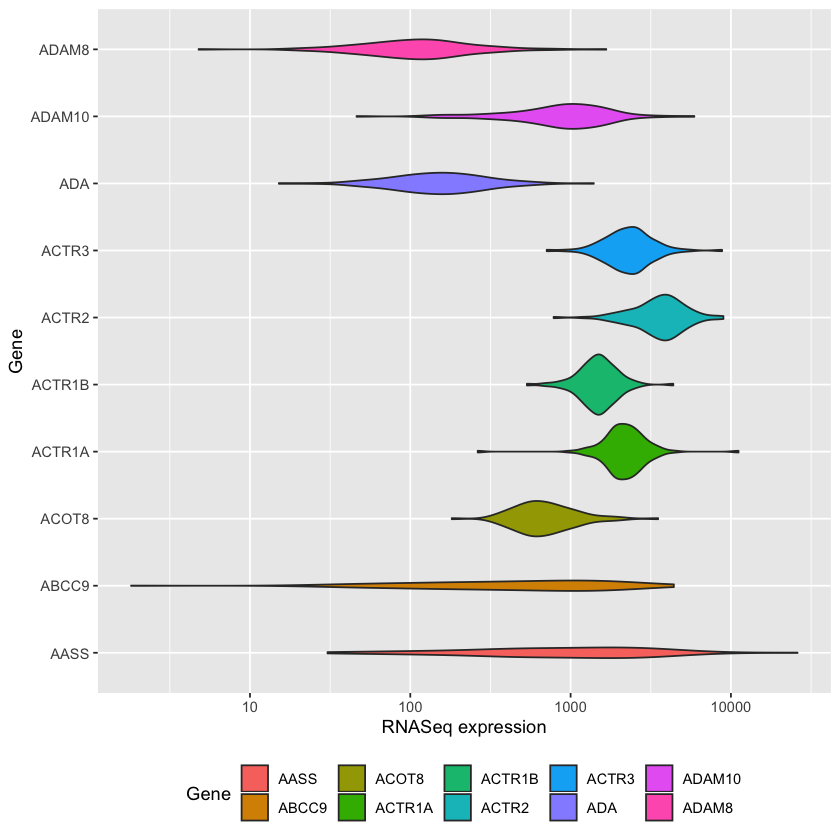

In [136]:
df_genes_melted_qs %>%
gather(Q,value,-Gene) %>% 
filter(Gene %in% genes) %>% 
ggplot() +
geom_violin(aes(Gene,value,fill=Gene)) +
labs(y="RNASeq expression") +
scale_y_log10() +
coord_flip() +
theme(
legend.position = "bottom")

## Choosing liver cancer clinical outcomes/characteristics for supervised learning

In [13]:
characterized = list()
for(name in names(clinical_dataset_list)){
    characterized[[name]] = na.omit(
        colnames(clinical_dataset_list[[name]])[
            sapply(clinical_dataset_list[[name]],
                   function(x){
                       as.integer(table(!is.na(x))['TRUE'])== 
                       nrow(clinical_dataset_list[[name]])
                   }
                  )
        ]
    )
    }

In [14]:
characterized

$luad
  [1] "admin.bcr"                                                                                               
  [2] "admin.day_of_dcc_upload"                                                                                 
  [3] "admin.disease_code"                                                                                      
  [4] "admin.file_uuid"                                                                                         
  [5] "admin.month_of_dcc_upload"                                                                               
  [6] "admin.patient_withdrawal.withdrawn"                                                                      
  [7] "admin.project_code"                                                                                      
  [8] "admin.year_of_dcc_upload"                                                                                
  [9] "patient.bcr_patient_barcode"                                                                             
 [10] "patient.bcr_patient_uuid"                                                                                
 [11] "patient.clinical_cqcf.anatomic_neoplasm_subdivision"                                                     
 [12] "patient.clinical_cqcf.consent_or_death_status"                                                           
 [13] "patient.clinical_cqcf.histological_type"                                                                 
 [14] "patient.clinical_cqcf.history_of_neoadjuvant_treatment"                                                  
 [15] "patient.clinical_cqcf.tumor_type"                                                                        
 [16] "patient.diagnosis"                                                                                       
 [17] "patient.gender"                                                                                          
 [18] "patient.histological_type"                                                                               
 [19] "patient.icd_10"                                                                                          
 [20] "patient.icd_o_3_histology"                                                                               
 [21] "patient.icd_o_3_site"                                                                                    
 [22] "patient.informed_consent_verified"                                                                       
 [23] "patient.month_of_form_completion"                                                                        
 [24] "patient.patient_id"                                                                                      
 [25] "patient.prior_dx"                                                                                        
 [26] "patient.stage_event.tnm_categories.pathologic_categories.pathologic_t"                                   
 [27] "patient.tissue_source_site"                                                                              
 [28] "patient.tumor_tissue_site"                                                                               
 [29] "patient.vital_status"                                                                                    
 [30] "patient.year_of_form_completion"                                                                         
 [31] "patient.bcr_canonical_check.bcr_patient_canonical_status"                                                
 [32] "patient.biospecimen_cqcf.consent_or_death_status"                                                        
 [33] "patient.biospecimen_cqcf.digital_image_submitted"                                                        
 [34] "patient.biospecimen_cqcf.frozen_specimen_anatomic_site"                                                  
 [35] "patient.biospecimen_cqcf.histological_type"                                                              
 [36] "patient.biospecimen_cqcf.history

In [15]:
fully_characterized_clinical_characteristics <- Reduce(intersect,characterized)

In [16]:
fully_characterized_clinical_characteristics

[1] "admin.bcr"                                                                                               
 [2] "admin.day_of_dcc_upload"                                                                                 
 [3] "admin.disease_code"                                                                                      
 [4] "admin.month_of_dcc_upload"                                                                               
 [5] "admin.patient_withdrawal.withdrawn"                                                                      
 [6] "admin.year_of_dcc_upload"                                                                                
 [7] "patient.bcr_patient_barcode"                                                                             
 [8] "patient.bcr_patient_uuid"                                                                                
 [9] "patient.clinical_cqcf.tumor_type"                                                                        
[10] "patient.gender"                                                                                          
[11] "patient.icd_10"                                                                                          
[12] "patient.icd_o_3_histology"                                                                               
[13] "patient.icd_o_3_site"                                                                                    
[14] "patient.informed_consent_verified"                                                                       
[15] "patient.month_of_form_completion"                                                                        
[16] "patient.patient_id"                                                                                      
[17] "patient.tissue_source_site"                                                                              
[18] "patient.vital_status"                                                                                    
[19] "patient.year_of_form_completion"                                                                         
[20] "patient.bcr_canonical_check.bcr_patient_canonical_status"                                                
[21] "patient.samples.sample-2.bcr_sample_barcode"                                                             
[22] "patient.samples.sample-2.bcr_sample_uuid"                                                                
[23] "patient.samples.sample-2.is_ffpe"                                                                        
[24] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.bcr_aliquot_barcode"         
[25] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.bcr_aliquot_uuid"            
[26] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.center_id"                   
[27] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.concentration"               
[28] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.day_of_shipment"             
[29] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.is_derived_from_ffpe"        
[30] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.month_of_shipment"           
[31] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.plate_column"                
[32] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.plate_id"                    
[33] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.plate_row"                   
[34] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.quantity"                    
[35] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot.source_center"               
[36] "patient.samples.sample-2.portions.portion.analytes.analyte.aliquots.aliquot

could use icd10 (same for all luad, lihc, etc. samples), gender, tissue source site, vital status (dead/alive), icd o 3 site/histology, ...

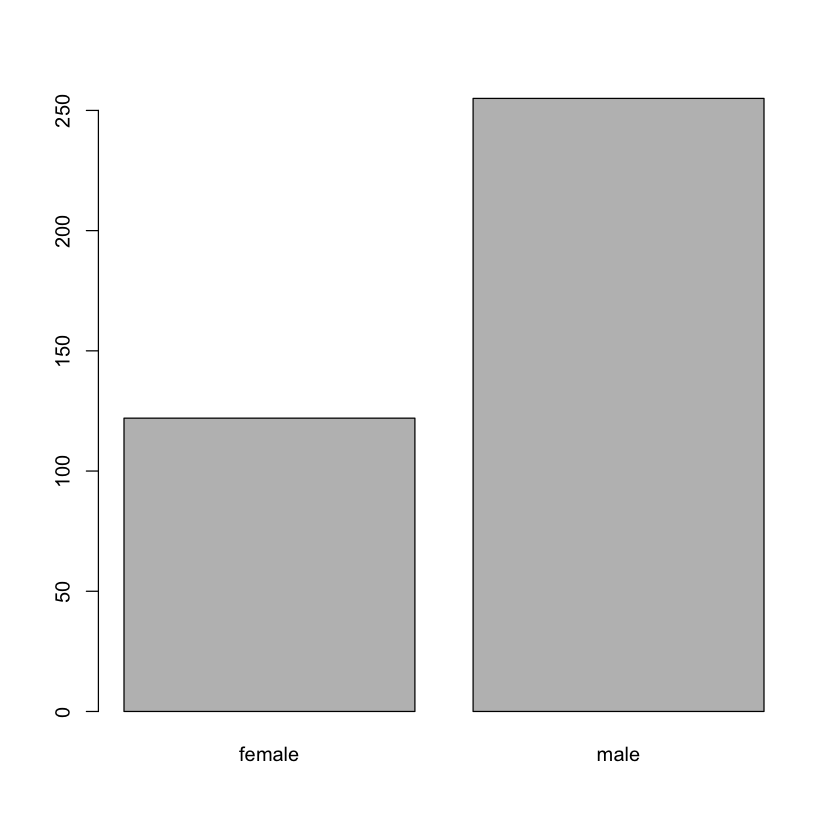

In [17]:
barplot(table(clinical_dataset_list[['lihc']][,'patient.gender']))